# IMDb Movie Reviews Classification

### 1. Data Loading and Initial Setup

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the cleaned IMDb dataset
# Replace 'your_dataset.csv' with the actual file path
df = pd.read_csv('cleaned_imdb_sample.csv')
df.head()

,review,sentiment,cleaned_review
0,In Panic In The Streets Richard Widmark plays ...,positive,panic street richard widmark play navy doctor ...
1,If you ask me the first one was really better ...,negative,ask first one really better one look sarah rea...
2,I am a big fan a Faerie Tale Theatre and I've ...,positive,big fan faerie tale theatre ive seen one best ...
3,I just finished reading a book about Dillinger...,negative,finished reading book dillinger movie horribly...
4,Greg Davis and Bryan Daly take some crazed sta...,negative,greg davis bryan daly take crazed statement te...


In [4]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

Dataset Shape: (10000, 3)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review          10000 non-null  object
 1   sentiment       10000 non-null  object
 2   cleaned_review  10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB
None


In [5]:
# Explore the dataset structure
print("Column names:", df.columns.tolist())
print("\nSentiment distribution:")
print(df['sentiment'].value_counts())
print("\nSample of cleaned reviews:")
for i in range(3):
    print(f"\nReview {i+1} ({df['sentiment'].iloc[i]}):")
    print(df['cleaned_review'].iloc[i][:200] + "...")

Column names: ['review', 'sentiment', 'cleaned_review']

Sentiment distribution:
sentiment
positive    5038
negative    4962
Name: count, dtype: int64

Sample of cleaned reviews:

Review 1 (positive):
panic street richard widmark play navy doctor week rudely interrupted corpse contains plague cop paul douglas properly point guy died two bullet chest thats issue two become unwilling partner effort f...

Review 2 (negative):
ask first one really better one look sarah real mean cruel girl look amy adam little fool hanging around nothing people dont adore second sebastian cute hot first movie baby face story good understand...

Review 3 (positive):
big fan faerie tale theatre ive seen one best funny romantic classic recommend age great little kid well cinderella great adult teen funny top watched little still watch great line family quote time a...


### 2. Data Preprocessing and Feature Extraction

In [6]:
# Prepare the data
# Extract features (cleaned_review) and target (sentiment)
X = df['cleaned_review']
y = df['sentiment']

print("Feature shape:", X.shape)
print("Target shape:", y.shape)
print("\nTarget distribution:")
print(y.value_counts(normalize=True))

Feature shape: (10000,)
Target shape: (10000,)

Target distribution:
sentiment
positive    0.5038
negative    0.4962
Name: proportion, dtype: float64


In [7]:
# Perform 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))
print("\nTraining set sentiment distribution:")
print(y_train.value_counts(normalize=True))

Training set size: 8000
Test set size: 2000

Training set sentiment distribution:
sentiment
positive    0.50375
negative    0.49625
Name: proportion, dtype: float64


In [8]:
# TF-IDF Vectorization
print("Applying TF-IDF vectorization...")

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(
    max_features=10000,  # Limit to top 10k features
    stop_words='english',
    ngram_range=(1, 2),  # Include unigrams and bigrams
    min_df=2,  # Ignore terms that appear in less than 2 documents
    max_df=0.95  # Ignore terms that appear in more than 95% of documents
)

# Fit and transform training data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"TF-IDF matrix shape - Train: {X_train_tfidf.shape}")
print(f"TF-IDF matrix shape - Test: {X_test_tfidf.shape}")
print(f"Number of features: {len(tfidf.get_feature_names_out())}")

Applying TF-IDF vectorization...
TF-IDF matrix shape - Train: (8000, 10000)
TF-IDF matrix shape - Test: (2000, 10000)
Number of features: 10000


### 3. Model Training
#### 3.1 Logistic Regression

In [9]:
print("Training Logistic Regression...")

# Initialize and train Logistic Regression
lr_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    C=1.0
)

lr_model.fit(X_train_tfidf, y_train)
print("Logistic Regression training completed.")

Training Logistic Regression...
Logistic Regression training completed.


#### 3.2 Decision Tree

In [10]:
print("Training Decision Tree...")

# Initialize and train Decision Tree
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10
)

dt_model.fit(X_train_tfidf, y_train)
print("Decision Tree training completed.")

Training Decision Tree...
Decision Tree training completed.


#### 3.3 Random Forest

In [11]:
print("Training Random Forest...")

# Initialize and train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    n_jobs=-1
)

rf_model.fit(X_train_tfidf, y_train)
print("Random Forest training completed.")

Training Random Forest...
Random Forest training completed.


### 4. Model Evaluation

In [12]:
# Make predictions for all models
models = {
    'Logistic Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model
}

predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_test_tfidf)

In [13]:
# Calculate metrics for each model
results = {}

for name, y_pred in predictions.items():
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    
    print(f"\n=== {name} Results ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")


=== Logistic Regression Results ===
Accuracy: 0.8625
Precision: 0.8630
Recall: 0.8625
F1-Score: 0.8624

=== Decision Tree Results ===
Accuracy: 0.7050
Precision: 0.7287
Recall: 0.7050
F1-Score: 0.6965

=== Random Forest Results ===
Accuracy: 0.8045
Precision: 0.8095
Recall: 0.8045
F1-Score: 0.8036


In [14]:
# Detailed classification reports
for name, y_pred in predictions.items():
    print(f"\n=== {name} - Detailed Classification Report ===")
    print(classification_report(y_test, y_pred))


=== Logistic Regression - Detailed Classification Report ===
              precision    recall  f1-score   support

    negative       0.88      0.84      0.86       992
    positive       0.85      0.88      0.87      1008

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000


=== Decision Tree - Detailed Classification Report ===
              precision    recall  f1-score   support

    negative       0.80      0.54      0.64       992
    positive       0.66      0.87      0.75      1008

    accuracy                           0.70      2000
   macro avg       0.73      0.70      0.70      2000
weighted avg       0.73      0.70      0.70      2000


=== Random Forest - Detailed Classification Report ===
              precision    recall  f1-score   support

    negative       0.85      0.74      0.79       992
    positive       0.77      0.87      0.82      1008

    accu

In [15]:
# Create comparison table
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)

print("=== Model Performance Comparison ===")
print(results_df)

# Identify best performing model
best_model_accuracy = results_df['Accuracy'].idxmax()
best_model_f1 = results_df['F1-Score'].idxmax()

print(f"\nBest model by Accuracy: {best_model_accuracy} ({results_df.loc[best_model_accuracy, 'Accuracy']:.4f})")
print(f"Best model by F1-Score: {best_model_f1} ({results_df.loc[best_model_f1, 'F1-Score']:.4f})")

=== Model Performance Comparison ===
                     Accuracy  Precision  Recall  F1-Score
Logistic Regression    0.8625     0.8630  0.8625    0.8624
Decision Tree          0.7050     0.7287  0.7050    0.6965
Random Forest          0.8045     0.8095  0.8045    0.8036

Best model by Accuracy: Logistic Regression (0.8625)
Best model by F1-Score: Logistic Regression (0.8624)


### 5. Visualization

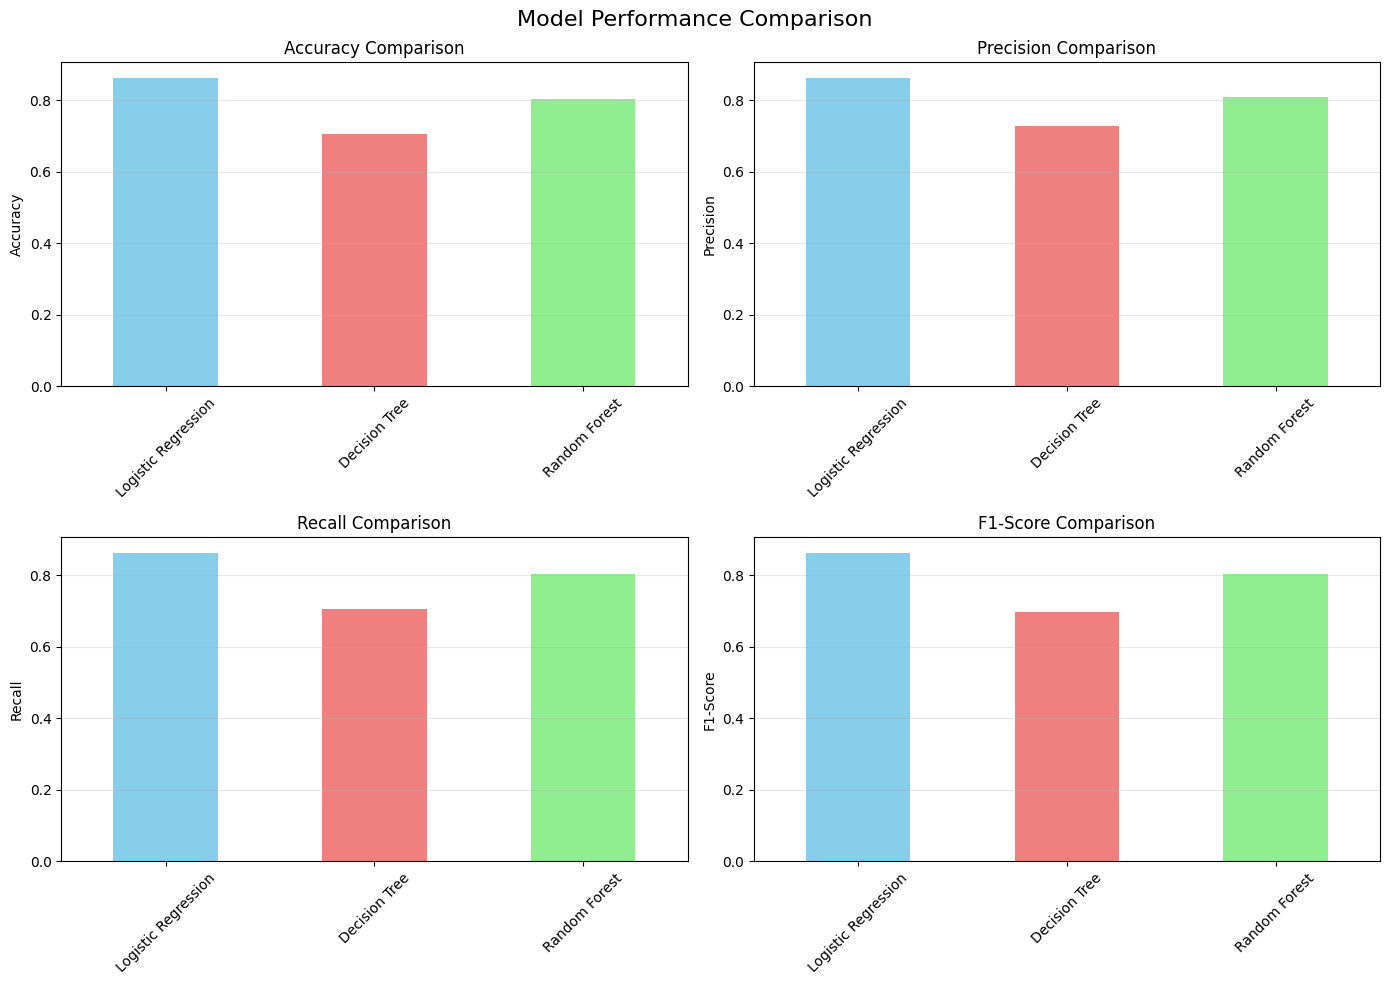

In [16]:
# Plot model performance comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Performance Comparison', fontsize=16)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    results_df[metric].plot(kind='bar', ax=ax, color=['skyblue', 'lightcoral', 'lightgreen'])
    ax.set_title(f'{metric} Comparison')
    ax.set_ylabel(metric)
    ax.set_xticklabels(results_df.index, rotation=45)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

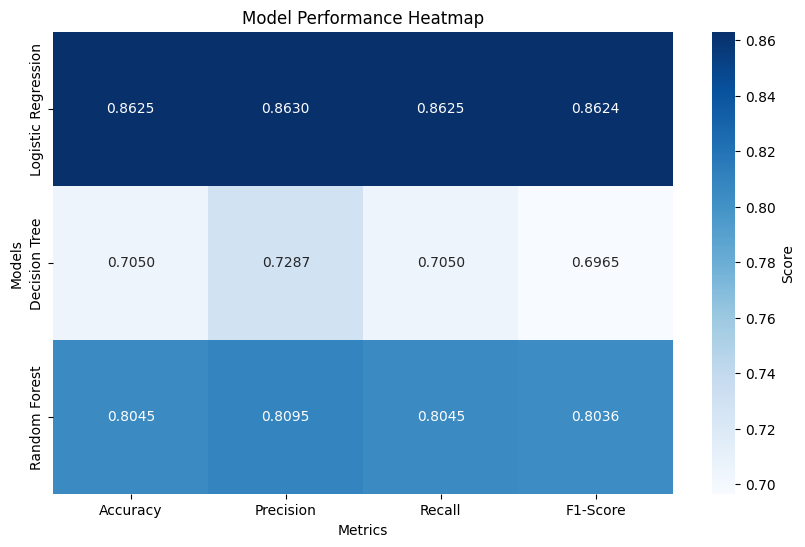

In [17]:
# Create a heatmap of the results
plt.figure(figsize=(10, 6))
sns.heatmap(results_df, annot=True, cmap='Blues', fmt='.4f', cbar_kws={'label': 'Score'})
plt.title('Model Performance Heatmap')
plt.ylabel('Models')
plt.xlabel('Metrics')
plt.show()

### 6. Example Predictions

In [18]:
# Show example predictions with actual reviews
print("=== Example Predictions ===")

# Select a few random samples from test set
sample_indices = np.random.choice(len(X_test), 5, replace=False)

for i, idx in enumerate(sample_indices):
    actual_review = X_test.iloc[idx]
    actual_sentiment = y_test.iloc[idx]
    
    print(f"\n--- Example {i+1} ---")
    print(f"Review: {actual_review[:150]}...")
    print(f"Actual Sentiment: {actual_sentiment}")
    
    # Show predictions from all models
    test_sample = X_test_tfidf[idx]
    for name, model in models.items():
        pred = model.predict(test_sample)[0]
        confidence = max(model.predict_proba(test_sample)[0])
        print(f"{name} Prediction: {pred} (Confidence: {confidence:.3f})")

=== Example Predictions ===

--- Example 1 ---
Review: better typical madefortv movie invitation hell blessed excellent casting urich lucci cassidy mccarthy premurphy brown joe regalbuto soleil moonfrye hi...
Actual Sentiment: positive
Logistic Regression Prediction: positive (Confidence: 0.601)
Decision Tree Prediction: positive (Confidence: 0.884)
Random Forest Prediction: positive (Confidence: 0.533)

--- Example 2 ---
Review: liked best film like film hitchcock thriller take seriouslyhitchcock understood people movie good time something hollywood seems forgotten recent year...
Actual Sentiment: positive
Logistic Regression Prediction: positive (Confidence: 0.833)
Decision Tree Prediction: negative (Confidence: 0.909)
Random Forest Prediction: positive (Confidence: 0.539)

--- Example 3 ---
Review: picked movie cover even knowing watched laughed hard one favorite movie time rusty guy created masterpiece would highly recommend movie one sense humo...
Actual Sentiment: positive
Logist

In [19]:
# Show example predictions with actual reviews
print("=== Example Predictions ===")

# Select a few random samples from test set
sample_indices = np.random.choice(len(X_test), 5, replace=False)

for i, idx in enumerate(sample_indices):
    actual_review = X_test.iloc[idx]
    actual_sentiment = y_test.iloc[idx]
    
    print(f"\n--- Example {i+1} ---")
    print(f"Review: {actual_review[:150]}...")
    print(f"Actual Sentiment: {actual_sentiment}")
    
    # Show predictions from all models
    test_sample = X_test_tfidf[idx]
    for name, model in models.items():
        pred = model.predict(test_sample)[0]
        confidence = max(model.predict_proba(test_sample)[0])
        print(f"{name} Prediction: {pred} (Confidence: {confidence:.3f})")

=== Example Predictions ===

--- Example 1 ---
Review: thought quiet good movie fun watch liked best outtake end movie great...
Actual Sentiment: positive
Logistic Regression Prediction: positive (Confidence: 0.924)
Decision Tree Prediction: positive (Confidence: 0.831)
Random Forest Prediction: positive (Confidence: 0.560)

--- Example 2 ---
Review: fastpaced funny sexy spectacular cagney always terrific blondel charm wit energy obvious precensorship film innuendo script costumesand way touch biki...
Actual Sentiment: positive
Logistic Regression Prediction: positive (Confidence: 0.784)
Decision Tree Prediction: positive (Confidence: 0.869)
Random Forest Prediction: positive (Confidence: 0.544)

--- Example 3 ---
Review: anyone interested obtaining copy film please read bottom description first telecast cbs november madefortv finding john christmas sequel previous year...
Actual Sentiment: positive
Logistic Regression Prediction: positive (Confidence: 0.640)
Decision Tree Prediction: 

In [20]:
# Analyze feature importance (for tree-based models)
print("=== Feature Importance Analysis ===")

# Get feature names
feature_names = tfidf.get_feature_names_out()

# Decision Tree feature importance
dt_importance = dt_model.feature_importances_
dt_top_features = np.argsort(dt_importance)[-10:]

print("\nTop 10 Important Features - Decision Tree:")
for idx in reversed(dt_top_features):
    print(f"{feature_names[idx]}: {dt_importance[idx]:.4f}")

# Random Forest feature importance
rf_importance = rf_model.feature_importances_
rf_top_features = np.argsort(rf_importance)[-10:]

print("\nTop 10 Important Features - Random Forest:")
for idx in reversed(rf_top_features):
    print(f"{feature_names[idx]}: {rf_importance[idx]:.4f}")

=== Feature Importance Analysis ===

Top 10 Important Features - Decision Tree:
bad: 0.2281
worst: 0.1499
great: 0.0985
waste: 0.0837
boring: 0.0521
awful: 0.0504
excellent: 0.0318
poor: 0.0314
wonderful: 0.0267
terrible: 0.0227

Top 10 Important Features - Random Forest:
worst: 0.0438
bad: 0.0310
worse: 0.0277
awful: 0.0266
great: 0.0265
waste: 0.0190
plot: 0.0160
wonderful: 0.0158
stupid: 0.0141
love: 0.0138


### 7. Model Analysis and Insights
#### 7.1 Performance Summary

In [21]:
print("=== FINAL PERFORMANCE SUMMARY ===")
print("\nRanking by Accuracy:")
accuracy_ranking = results_df.sort_values('Accuracy', ascending=False)
for i, (model, row) in enumerate(accuracy_ranking.iterrows(), 1):
    print(f"{i}. {model}: {row['Accuracy']:.4f}")

print("\nRanking by F1-Score:")
f1_ranking = results_df.sort_values('F1-Score', ascending=False)
for i, (model, row) in enumerate(f1_ranking.iterrows(), 1):
    print(f"{i}. {model}: {row['F1-Score']:.4f}")

=== FINAL PERFORMANCE SUMMARY ===

Ranking by Accuracy:
1. Logistic Regression: 0.8625
2. Random Forest: 0.8045
3. Decision Tree: 0.7050

Ranking by F1-Score:
1. Logistic Regression: 0.8624
2. Random Forest: 0.8036
3. Decision Tree: 0.6965


#### 7.2 Key Insights

In [22]:
print("=== KEY INSIGHTS ===")

best_overall = results_df.mean(axis=1).idxmax()
print(f"\n1. BEST OVERALL PERFORMER: {best_overall}")
print(f"   Average Score: {results_df.mean(axis=1)[best_overall]:.4f}")

print("\n2. MODEL CHARACTERISTICS:")
print("   • Logistic Regression: Fast, interpretable, good baseline")
print("   • Decision Tree: Highly interpretable, prone to overfitting")
print("   • Random Forest: Robust, handles overfitting better, less interpretable")

print("\n3. INTERPRETABILITY vs PERFORMANCE TRADE-OFFS:")
interpretability_order = ["Logistic Regression", "Decision Tree", "Random Forest"]
performance_order = results_df.sort_values('F1-Score', ascending=False).index.tolist()

print("   Most Interpretable → Least Interpretable:", " → ".join(interpretability_order))
print("   Best Performance → Worst Performance:", " → ".join(performance_order))

print("\n4. RECOMMENDATIONS:")
if best_overall == "Logistic Regression":
    print("   • Use Logistic Regression for production - good balance of performance and interpretability")
elif best_overall == "Random Forest":
    print("   • Use Random Forest for best performance, Logistic Regression if interpretability is crucial")
else:
    print("   • Consider ensemble methods or hyperparameter tuning for better performance")

=== KEY INSIGHTS ===

1. BEST OVERALL PERFORMER: Logistic Regression
   Average Score: 0.8626

2. MODEL CHARACTERISTICS:
   • Logistic Regression: Fast, interpretable, good baseline
   • Decision Tree: Highly interpretable, prone to overfitting
   • Random Forest: Robust, handles overfitting better, less interpretable

3. INTERPRETABILITY vs PERFORMANCE TRADE-OFFS:
   Most Interpretable → Least Interpretable: Logistic Regression → Decision Tree → Random Forest
   Best Performance → Worst Performance: Logistic Regression → Random Forest → Decision Tree

4. RECOMMENDATIONS:
   • Use Logistic Regression for production - good balance of performance and interpretability
